In [87]:
import pandas as pd
from fastai.tabular.all import *
from fastai.tabular.data import *
from functools import reduce
from tqdm.notebook import tqdm

In [88]:
df = pd.read_csv('../public_data/train.csv')
test = pd.read_csv('../public_data/test.csv')
build_owner = pd.read_csv('../public_data/building_ownership.csv')
build_struct = pd.read_csv('../public_data/building_structure.csv')
ward_demo = pd.read_csv('../public_data/ward_demographic_data.csv')

In [89]:
build_owner.columns, build_struct.columns, ward_demo.columns

(Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
        'legal_ownership_status', 'count_families', 'has_secondary_use',
        'has_secondary_use_agriculture', 'has_secondary_use_hotel',
        'has_secondary_use_rental', 'has_secondary_use_institution',
        'has_secondary_use_school', 'has_secondary_use_industry',
        'has_secondary_use_health_post', 'has_secondary_use_gov_office',
        'has_secondary_use_use_police', 'has_secondary_use_other'],
       dtype='object'),
 Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
        'count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft',
        'height_ft_pre_eq', 'land_surface_condition', 'foundation_type',
        'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
        'plan_configuration', 'has_superstructure_adobe_mud',
        'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
        'has_superstructure_cement_mortar_stone',
        'has_superstructure_

In [90]:
# joining on building_id
dfs = [df, build_owner,build_struct]
col_name='building_id'
df_final = reduce(lambda left,right: pd.merge(left,right,on=col_name), dfs)
df_final.shape, df_final.columns

((515937, 51),
 Index(['building_id', 'has_geotechnical_risk',
        'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_flood',
        'has_geotechnical_risk_land_settlement',
        'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
        'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
        'damage_grade', 'district_id_x', 'vdcmun_id_x', 'ward_id_x',
        'legal_ownership_status', 'count_families', 'has_secondary_use',
        'has_secondary_use_agriculture', 'has_secondary_use_hotel',
        'has_secondary_use_rental', 'has_secondary_use_institution',
        'has_secondary_use_school', 'has_secondary_use_industry',
        'has_secondary_use_health_post', 'has_secondary_use_gov_office',
        'has_secondary_use_use_police', 'has_secondary_use_other',
        'district_id_y', 'vdcmun_id_y', 'ward_id_y', 'count_floors_pre_eq',
        'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq',
        'land_surface_condition

In [91]:
df_end = df_final.merge(ward_demo,left_on='ward_id_x',right_on='ward_id')

In [92]:
df_end.columns

Index(['building_id', 'has_geotechnical_risk',
       'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'damage_grade', 'district_id_x', 'vdcmun_id_x', 'ward_id_x',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other',
       'district_id_y', 'vdcmun_id_y', 'ward_id_y', 'count_floors_pre_eq',
       'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq',
       'land_surface_condition', 'foundation_type', 'roof_ty

In [93]:
# Now let's try to model this

In [94]:
cat_names = ['has_geotechnical_risk',
       'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
             'legal_ownership_status', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other',
             'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type',
             'position',
                    'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
             'income_range_in_thousands'
            ]

cont_names = ['count_floors_pre_eq','age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq','household_count','avg_hh_size',
             'count_families']
target = 'damage_grade'
procs = [Categorify, FillMissing, Normalize]

In [95]:
#df_small = df_end.sample(frac=0.5)
to = TabularPandas(df_end, procs=[Categorify, FillMissing,Normalize],
                   cont_names = cont_names,
                   cat_names=cat_names,
                   y_names=target,
                   y_block=CategoryBlock,
                   splits=RandomSplitter(valid_pct=0.3)(range_of(df_small)))

In [107]:
# make very naive predictions
dls = to.dataloaders(bs=64)
learn = tabular_learner(dls,metrics=[accuracy])

SuggestedLRs(lr_min=0.001148153655230999, lr_steep=0.000588843657169491)

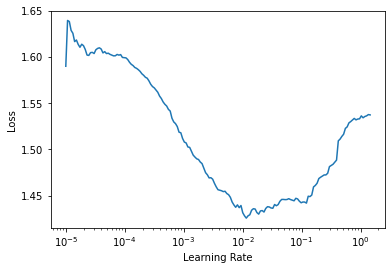

In [104]:
learn.lr_find(start_lr=1e-5,end_lr=10,num_it=200)

In [105]:
#lr_min=0.0018620871007442475

#lr_steep=0.004365158267319202
#lr_min=0.00162181

lr_min=0.001148153655230999
lr_steep=0.000588843657169491

In [108]:
learn.fit_one_cycle(1, lr_min)

KeyboardInterrupt: 

In [110]:
learn.fit_one_cycle(1,lr_steep)

epoch,train_loss,valid_loss,accuracy,time
0,1.242031,1.254816,0.449257,03:26


In [109]:
# let's try more batches with lr_steep
learn.fit_one_cycle(10,max_lr=slice(lr_steep))

KeyboardInterrupt: 

In [111]:
learn.export('monster_model_10batches.pkl')

In [112]:
learn.dl

In [18]:
# let's try predicting something
test.iloc[0]

building_id                              680648.0
has_geotechnical_risk                         0.0
has_geotechnical_risk_fault_crack             0.0
has_geotechnical_risk_flood                   0.0
has_geotechnical_risk_land_settlement         0.0
has_geotechnical_risk_landslide               0.0
has_geotechnical_risk_liquefaction            0.0
has_geotechnical_risk_other                   0.0
has_geotechnical_risk_rock_fall               0.0
Name: 0, dtype: float64

In [20]:
# pre process test
dfs = [test, build_owner,build_struct]
col_name='building_id'
df_final = reduce(lambda left,right: pd.merge(left,right,on=col_name), dfs)
#df_final.shape, df_final.columns
df_end_test = df_final.merge(ward_demo,left_on='ward_id_x',right_on='ward_id')
df_end_test.iloc[0]

building_id                                                 680648
has_geotechnical_risk                                            0
has_geotechnical_risk_fault_crack                                0
has_geotechnical_risk_flood                                      0
has_geotechnical_risk_land_settlement                            0
has_geotechnical_risk_landslide                                  0
has_geotechnical_risk_liquefaction                               0
has_geotechnical_risk_other                                      0
has_geotechnical_risk_rock_fall                                  0
district_id_x                                                   38
vdcmun_id_x                                                   3812
ward_id_x                                                   381208
legal_ownership_status                                     Private
count_families                                                   1
has_secondary_use                                             

In [48]:
row, clas, probs = learn.predict(df_end_test.iloc[0])

In [28]:
df_end['damage_grade'].unique()

array([5, 2, 1, 3, 4], dtype=int64)

In [30]:
learn.

In [32]:
df_end_test.iloc[0:2]

,building_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,district_id_x,...,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,ward_id,household_count,income_range_in_thousands,avg_hh_size
0,680648,0.0,0,0,0,0,0,0,0,38,...,0,0,0,0,0,0,381208,38,0-10,5
1,680627,0.0,0,0,0,0,0,0,0,38,...,0,0,0,0,0,0,381208,38,0-10,5


In [34]:
row

   has_geotechnical_risk  has_geotechnical_risk_fault_crack  \
0                    1.0                                1.0   

   has_geotechnical_risk_flood  has_geotechnical_risk_land_settlement  \
0                          1.0                                    1.0   

   has_geotechnical_risk_landslide  has_geotechnical_risk_liquefaction  \
0                              1.0                                 1.0   

   has_geotechnical_risk_other  has_geotechnical_risk_rock_fall  \
0                          1.0                              1.0   

   legal_ownership_status  has_secondary_use  ...  income_range_in_thousands  \
0                     3.0                1.0  ...                        1.0   

   count_families_na  count_floors_pre_eq  age_building  plinth_area_sq_ft  \
0                1.0            -1.558896     -0.242373          -0.421158   

   height_ft_pre_eq  household_count  avg_hh_size  count_families  \
0         -1.606235        -0.636685     0.089951      

In [36]:
learn.data.add_test(df_end_test)
#preds = learn.get_preds(ds_type=DatasetType.Test)

AttributeError: 'TabularLearner' object has no attribute 'data'

In [86]:
preds = []
for i in tqdm(range(len(df_end_test))):
    obj = df_end_test.iloc[i]
    row, _,_ = learn.predict(obj)
    preds.append({'building_id':df_end_test.iloc[i]['building_id'],
                  'damage_grade':int(row['damage_grade'].tolist()[0])})

KeyboardInterrupt: 

In [81]:
pd.DataFrame(preds).head()

,building_id,damage_grade
0,680648,4
1,680627,4
2,680628,2
3,680644,4
4,680633,4
